In [1]:
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import os
from tqdm import tqdm

In [2]:
os.chdir('C:\\Users\\chandan.malla\\Desktop\\Data Science_chandan\\Applied AI notes\\NLP\\Amazon Fine Food reviews')
os.listdir()

['.ipynb_checkpoints',
 'BOW,TFIDF,W2V,AVGw2v, avg tfidif.ipynb',
 'database.sqlite',
 'dsfds.png',
 'final2.sqlite',
 'GoogleNews-vectors-ngative300.bin',
 'hashes.txt',
 'Pre-Proccessed_30000.sqlite',
 'Pre-Proccessed_Stemmed_30.sqlite',
 'Pre-Proccessed_Stemmed_30000.sqlite',
 'Pre-Processed_30000.sqlite',
 'Reviews.csv']

In [3]:
con = sqlite3.connect('./database.sqlite')
raw_data = pd.read_sql_query('select * from reviews',con)

In [4]:
temp = raw_data['Score']
temp = temp.map(lambda x:1 if x>3 else 0)
raw_data['Score'] = temp
raw_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
final = raw_data.drop_duplicates({'UserId','ProfileName', 'Time','Text'},keep = 'first' , inplace = False)

In [6]:
final = final[final['HelpfulnessNumerator']<=final['HelpfulnessDenominator']]

In [8]:
#######Sample only 30000 points
final = final.sample(n=3000,random_state=0).reset_index()

In [9]:
##### regular Expression https://pymotw.com/2/re
from bs4 import BeautifulSoup
import re
##Remove all http links
def remhttp(text): 
    text = re.sub(r'http\S+',' ',text) ##\S is all the non-whitespace character + - one or more
    return text

##Remove all html tags
def remhtml(text):
    soup = BeautifulSoup(text, 'lxml')
    text = soup.get_text()
    return text

##Remove all punct. or special characters
def remchar(text):
    text = re.sub(r'[^A-Za-z0-9\s]+',' ',text)
    return text

##Remove all words less than 3 letters
#def remles2letter(text):
 #   text = re.sub(r'\W*\b\w{1,3}\b',' ',text)
  #  return text
##convert to lower
def lower(text):
    text = text.lower()
    return text


def allconvert(text):
    return lower(remchar(remhtml(remhttp(text))))
final['Score'][1]

1

In [10]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#import nltk
#nltk.download('stopwords')                                     download stopwords

#stop = set(stopwords.words('english'))

##we can use set stopwords manually also.
stop= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])
sno = SnowballStemmer('english')
#stop = set(stopwords.words('english'))
print(stop)

{'into', 'what', "mustn't", 'each', 'during', "it's", 'over', 'too', 'we', 'can', "needn't", 'than', 'only', 'the', 'when', 'a', 'more', 'again', 'themselves', 'is', 'does', 'any', 'of', 'myself', 'it', 'your', "you're", "you've", 'himself', 'with', 'this', 'all', 'same', 'hasn', 'itself', 'hers', 'under', 'her', "shan't", 'from', 'will', "you'd", 're', "weren't", 'here', 'their', 'off', "won't", 'on', 'br', 'to', 'ourselves', "mightn't", 'them', 'below', 'theirs', 'shouldn', "that'll", 'between', 'above', 'aren', 'if', 't', "wouldn't", 'ours', 'am', 'just', 'then', 'yourselves', 'wouldn', 'further', 'other', "should've", "aren't", 'should', "haven't", "shouldn't", 'were', 'hadn', 'own', 'o', 'and', 'through', 'down', 'don', 'she', 'shan', "hadn't", 'my', 'but', 'him', 'weren', 'about', 'are', 'which', 'did', "hasn't", 'at', "didn't", 'why', 'its', 'once', 'there', "doesn't", 'mightn', 'doing', 'that', 'up', 'while', "isn't", 'both', 'because', "don't", 'being', 'll', 'for', 'by', 'som

In [11]:
###CODE to do actual Pre-Processing for ['Text']:

i=-1
all_positive_words=[]
all_negative_words=[]
final_text=[]
for text in final['Text']:
    i = i+1
    filtered_words=[]
    text = allconvert(text)
    for w in text.split():
        if (w not in stop):
            s =(sno.stem(w))
            filtered_words.append(s)
            if (final['Score'].values)[i]==1:
                all_positive_words.append(w)
            if (final['Score'].values)[i]==0:
                all_negative_words.append(w)
        else:
            continue
    str =' '.join(filtered_words)
    final_text.append(str)


                
    

In [13]:
final['Cleanedtext'] = final_text

In [14]:
sorted_data=final.sort_values('Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

# BOW

Here the fit method, when applied to the training dataset,learns the model parameters (for example, mean and standard deviation). We then need to apply the transform method on the training dataset to get the transformed (scaled) training dataset. We could also perform both of this steps in one step by applying fit_transform on the training dataset.

Then why do we need 2 separate methods - fit and transform ?

In practice we need to have a separate training and testing dataset and that is where having a separate fit and transform method helps. We apply fit on the training dataset and use the transform method on both - the training dataset and the test dataset. Thus the training as well as the test dataset are then transformed(scaled) using the model parameters that were learnt on applying the fit method the training dataset.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(sorted_data['Cleanedtext'],sorted_data['Score'],test_size=0.3,random_state=0)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(min_df=10, max_features=500,ngram_range=(1,3))

#Min_df When building the vocabulary ignore terms that
##have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. 
#Max_features : If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.


train_bow = count_vect.fit_transform(x_train)
test_bow = count_vect.transform(x_test)
#CV_bow = count_vect.transform(x_cv)

# TFIDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_count_vect = TfidfVectorizer( max_features=2000,ngram_range=(1,1))
train_tfidf = tfidf_count_vect.fit_transform(final['Cleanedtext'])
#test_tfidf = tfidf_count_vect.transform(x_test)
#CV_tfidf = tfidf_count_vect.transform(x_cv)

In [21]:
top_2000 = tfidf_count_vect.get_feature_names()

# Co-occurence Matrix

In [22]:
from tqdm import tqdm
n_neighbor = 5
occ_matrix_2000 = np.zeros((2000,2000))
for row in tqdm(final['Cleanedtext'].values):
    words_in_row = row.split()
    for index,word in enumerate(words_in_row):
        if word in top_2000:
            for j in range(max(index-n_neighbor,0),min(index+n_neighbor,len(words_in_row)-1) + 1):
                if words_in_row[j] in top_2000:
                    occ_matrix_2000[top_2000.index(word),top_2000.index(words_in_row[j])] += 1
                else:
                    pass
        else:
            pass

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:57<00:00, 51.91it/s]


# SVD

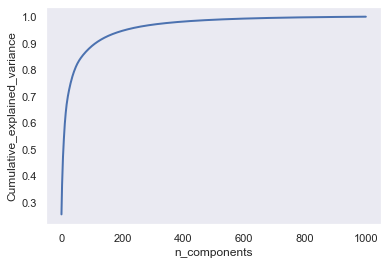

In [23]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
svd = TruncatedSVD(n_components = 1000)
svd_2000 = svd.fit_transform(occ_matrix_2000)

percentage_var_explained = svd.explained_variance_ / np.sum(svd.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
plt.figure(figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [24]:
svd = TruncatedSVD(n_components = 150)
svd_2000 = svd.fit_transform(occ_matrix_2000)


In [70]:
svd_2000

array([[ 7.77948297e+00,  2.95505488e+00, -2.80872322e+00, ...,
         3.14025156e-01, -2.18851017e-01, -1.02284341e+00],
       [ 3.24768758e+01, -3.27682471e+00, -1.02800265e+01, ...,
        -1.10924857e+00, -9.56328594e-01, -3.92817610e+00],
       [ 2.13731207e+01, -1.84299295e+00, -3.68296184e+00, ...,
        -2.21588128e+00,  3.00460391e+00, -9.43305404e-03],
       ...,
       [ 3.92551803e+00, -1.13103567e+00,  6.12933966e-01, ...,
        -1.17048487e-01, -5.82979126e-01,  4.40292820e-01],
       [ 2.66422453e+00, -6.73510548e-01, -2.80998334e+00, ...,
        -3.43253456e-02, -2.72206133e-01, -1.12470786e-01],
       [ 1.88427645e+00, -2.63428877e-01, -1.52320179e+00, ...,
        -2.58264945e-01,  4.47341310e-02,  1.27571078e-01]])

# K Means

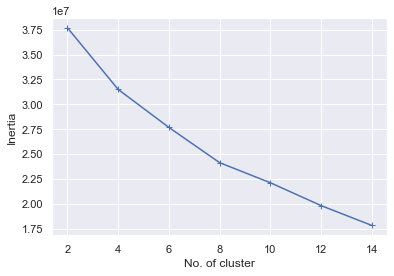

In [25]:
clusters = [2,4,6,8,10,12,14]
from sklearn.cluster import KMeans
dic = {}
for i in clusters:
    clus = KMeans(n_clusters = i)
    clus.fit(svd_2000)
    dic[i] = clus.inertia_
plt.plot(list(dic.keys()), list(dic.values()),'-+')
plt.xlabel("No. of cluster")
plt.ylabel("Inertia")
plt.show()

In [80]:
optimal_k = KMeans(n_clusters = 8)
p = optimal_k.fit_predict(svd_2000)
optimal_k.fit(svd_2000)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [72]:
list_of_sent = []
for i in final['Cleanedtext'].values:
    sent = []
    for word in i.split():
        sent.append(word)
    list_of_sent.append(sent)

In [73]:
index = []
for i in range(len(p)):
    if p[i] == 0:
        index.append(i)

In [74]:
print(len(index))
print(len(p))


1987
2000


In [75]:
text = []
for i in range(len(index)):
    text.append(list_of_sent[index[i]])

3000

In [78]:
from wordcloud import WordCloud
from matplotlib.pyplot import figure
def plot_cluster_cloud(features, coef):
    coef_df = pd.DataFrame(coef, columns = features)
    #print(coef_df)
    print(len(coef_df))
    # Create a figure and set of 15 subplots because our k range is in between 
    fig, axes = plt.subplots(5, 3, figsize = (30, 20))
    fig.suptitle("Top 20 words for each cluster ", fontsize = 50)
    cent = range(len(coef_df))
    tip = zip(axes.flat, cent)
    print(tip)
    for ax, i in zip(axes.flat, cent):
        wordcloud = WordCloud(background_color = "white").generate_from_frequencies(coef_df.iloc[i,:].sort_values(ascending = False)[0:20])
        ax.imshow(wordcloud)
        ax.set_title("Cluster {} word cloud".format(i+1), fontsize = 30)
        ax.axis("off")
    plt.tight_layout()
    fig.subplots_adjust(top = 0.90)
    plt.show()

In [87]:
features = tfidf_count_vect.get_feature_names()
coef = optimal_k.cluster_centers_
plot_cluster_cloud(features, coef)
coef_df = pd.DataFrame(coef, columns = features)

ValueError: Shape of passed values is (8, 150), indices imply (8, 2000)

In [88]:
coef

array([[ 1.96476288e+01, -8.72557520e-01, -5.19506836e+00, ...,
        -1.00449062e-01,  4.91728846e-02, -4.32087635e-02],
       [ 1.38133299e+03, -7.34949096e+02,  6.90756024e+02, ...,
        -1.18320735e+00, -2.41376530e-02, -1.57129040e+00],
       [ 1.76252531e+03,  1.42596748e+03,  4.42270702e+02, ...,
        -6.89637545e-01, -5.87156207e-01,  2.53384536e-01],
       ...,
       [ 4.56117752e+02, -4.87464943e+01, -1.63107168e+02, ...,
        -7.16095079e-02, -3.01553681e-01,  1.59636973e-01],
       [ 8.78674982e+02, -7.95822380e+01, -4.86764177e+02, ...,
        -1.71711566e-01, -1.46685852e-01, -1.58956187e+00],
       [ 5.64144587e+02, -1.61524224e+02, -4.59532452e+02, ...,
         5.94734110e+00, -7.30863633e+00, -4.12277659e+00]])

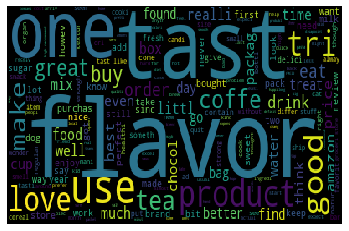

In [77]:

from wordcloud import WordCloud
from matplotlib.pyplot import figure
t_b = ''
for j in range(len(text)):
    for i in range(len(text[j])):
        t_b = t_b + text[j][i] + ' '
word_cloud = WordCloud(relative_scaling = 1.0).generate(t_b)
plt.imshow(word_cloud,aspect='auto')
plt.axis('off')
plt.show()

# 10 similar words [cosine similarity]

In [44]:

from sklearn.metrics.pairwise import cosine_similarity
def similar_word_10(word):
    similarity = cosine_similarity(occ_matrix_2000)
    word_vect = similarity[top_2000.index(word)]
    print("Similar Word to",word)
    index = word_vect.argsort()[::-1][1:11]
    for j in range(len(index)):
        print((j+1),"Word",top_2000[index[j]] ,"is similar to",word,"\n")

In [47]:
similar_word_10(top_2000[50])


Similar Word to actual
1 Word chamomil is similar to actual 

2 Word tast is similar to actual 

3 Word like is similar to actual 

4 Word imagin is similar to actual 

5 Word chunk is similar to actual 

6 Word not is similar to actual 

7 Word cheeto is similar to actual 

8 Word good is similar to actual 

9 Word hurt is similar to actual 

10 Word pomi is similar to actual 

